# 01 - KNN using L2 distance

For more info about this code, follow:

* https://www.tensorflow.org/get_started/mnist/beginners : the section
  about the mnist database
* https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/nearest_neighbor.ipynb
* http://nbviewer.jupyter.org/github/temporaer/tutorial_ml_gkbionics/blob/master/2%20-%20KMeans.ipynb : the section about k-means on image


## Getting the data

Let's keep it simple, we won't linearly scales image to have zero mean and unit norm.

In [1]:
# needed libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

# mnist.train = 55,000 input data
# mnist.test = 10,000 input data
# mnist.validate = 5,000 input data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# to make it simpler let's limit the train and test data set
# train: 2000 input data
# test: 500 input data
train_x, train_y = mnist.train.next_batch(2000)
test_x, test_y = mnist.test.next_batch(500)

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/h5py/__init__.py:34: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/h5py/__init__.py:43: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/h5py/_hl/group.py:24: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import 

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Let's look at a few examples from the train dataset

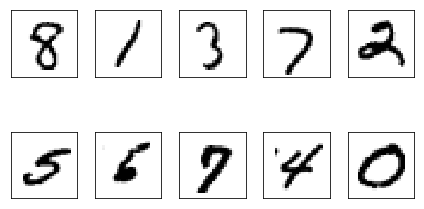

In [3]:
plt.rc("image", cmap="binary")  # use black/white palette for plotting
for i in xrange(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_x[i].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

## Implementing a simple KNN with Tensorflow

Okay, so let's implement the KNN (I assume you understand how KNN works, if you don't please have a look at the references in the beginning of this file), we will have only a predict function, there's no train phase.

In the code bellow k = 1.

In [4]:
# number of neighboors
K = 5

# tf Graph Input
ph_train = tf.placeholder("float", [None, 784])
ph_test = tf.placeholder("float", [784])

# Calculate L2 Distance
distance = tf.negative(tf.sqrt(tf.reduce_sum(
                       tf.square(tf.add(ph_train, tf.negative(ph_test))),
                       reduction_indices=1)))
 
# Prediction: Get K min distance index (Nearest neighbor)
pred_values_indices = tf.nn.top_k(distance, k=K, sorted=False)

# Initializing the variables
init = tf.global_variables_initializer()


## Running the graph with TF

In [ ]:
correct_class = 0
num_steps = 3000

with tf.Session() as session:
    
    session.run(init)
    
    for i in range(len(test_x)):
        values_indices = session.run(pred_values_indices,
                                feed_dict={
                                    ph_train: train_x,
                                    ph_test: test_x[i, :]})
        
        # predicting label for test data
        counter = np.zeros(10)   
        for j in xrange(K):
            counter[np.argmax(train_y[values_indices.indices[j]])] += 1

        prediction = np.argmax(counter)
        
        if prediction == np.argmax(test_y[i]):
            correct_class += 1.0

    print 'Done!'
    print 'Accuracy:', (correct_class / len(test_x)) * 100, '%'